In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Activation,Conv2D,MaxPool2D,AvgPool2D
from keras import backend as K


Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10

cifar = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [0]:
(X_train,y_train),(X_test,y_test) = cifar

In [0]:
dir(cifar10)

['K',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 'absolute_import',
 'division',
 'get_file',
 'load_batch',
 'load_data',
 'np',
 'os',
 'print_function']

In [0]:
type(cifar[0][1])

numpy.ndarray

In [0]:
cifar[0][1]

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [0]:
cifar[]

In [0]:
cifar[0][0]

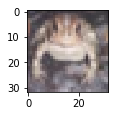

In [0]:
plt.figure(figsize=(3,1.5))

plt.imshow(cifar[0][0][12000])

In [0]:
labels[cifar[0][1][12000][0]]

NameError: ignored

In [0]:
def l_name(n):
  return labels[cifar[0][1][n][0]]

In [0]:
l_name(y_train[12000][0])

In [0]:
db1 = cifar10.get_file('data_batch_1','https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz')

In [0]:
db1

In [0]:
dir(cifar10)

In [0]:
cifar10.__package__

In [0]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [0]:
import cifar10.data_batch_1

In [0]:
type(cifar10)

In [0]:
t1 = np.array([4,5,4])

In [0]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [0]:
X_train.shape

In [0]:
X_train[2]

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= X_train.max()
X_test /= X_test.max()

In [0]:
from keras.utils.np_utils import to_categorical  
from keras.optimizers import RMSprop


In [0]:
y_train_cat = to_categorical(y_train,10)
y_test_cat = to_categorical(y_test,10)

In [0]:
K.clear_session()

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),input_shape = (32,32,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size =(2,2)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3)))
model.add(MaxPool2D(2,2))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [0]:

model.compile(metrics = ['accuracy'],loss = 'categorical_crossentropy',optimizer = 'rmsprop')

In [0]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
activation_1 (Activation)    (None, 5, 5, 64)         

In [0]:
model.fit(X_train,y_train_cat,batch_size = 32,epochs = 5,validation_data=(X_test,y_test_cat),shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 21s 427us/step - loss: 1.4410 - acc: 0.4850 - val_loss: 1.1293 - val_acc: 0.5999
Epoch 2/5
50000/50000 [==============================] - 21s 423us/step - loss: 1.0035 - acc: 0.6487 - val_loss: 1.0605 - val_acc: 0.6353
Epoch 3/5
50000/50000 [==============================] - 21s 418us/step - loss: 0.8235 - acc: 0.7153 - val_loss: 1.0639 - val_acc: 0.6479
Epoch 4/5
50000/50000 [==============================] - 21s 414us/step - loss: 0.7171 - acc: 0.7544 - val_loss: 0.9258 - val_acc: 0.7073
Epoch 5/5
50000/50000 [==============================] - 22s 433us/step - loss: 0.6580 - acc: 0.7758 - val_loss: 0.8872 - val_acc: 0.7154


In [0]:
#model.evaluate(X_test,y_test_cat)

In [0]:
model.predict(X_test[3000])

In [0]:
plt.imshow(X_test[13])

In [0]:
def l_name_tr(n):
  return labels[y_test[n][0]]

In [0]:
y_test[13][0]

In [0]:
labels[7]

In [0]:
model.predict(X_test)[34].shape

(10,)

In [0]:
X_test[1][0]

In [0]:
labels

In [0]:
#def distr(n):
  plt.figure(figsize=(9,4))
  df = pd.DataFrame(model.predict(X_test)[n],index=labels)
  #df.columns = labels
  #plt.imshow(X_test[n],index=1)
  #plt.figure(figsize=(10,8))
  sns.stripplot(y = df[n],x =df.index,size = 10)
  
  

In [0]:
def distr(n):
  x = labels
  y = model.predict(X_test)[n]
  plt.figure(figsize = (22,6))
  plt.subplot(1,2,1)
  plt.scatter(x,y,cmap='plasma')
  #plt.figure()
  plt.subplot(1,2,2)
  plt.imshow(X_test[n])

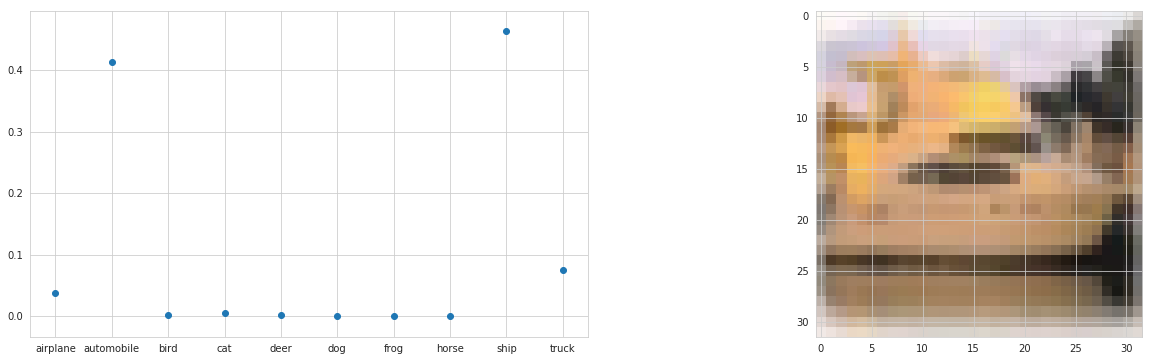

In [0]:
distr(7542)

In [0]:
import seaborn as sns

In [0]:
df = pd.DataFrame(model.predict(X_test)[2],index=labels)

  

In [0]:
model.predict(X_test)[50]

array([8.5589527e-05, 9.2927643e-05, 3.1321596e-02, 1.5246098e-04,
       1.5822065e-04, 2.8912839e-06, 1.9840384e-03, 4.2249325e-05,
       1.7503140e-06, 9.6615833e-01], dtype=float32)

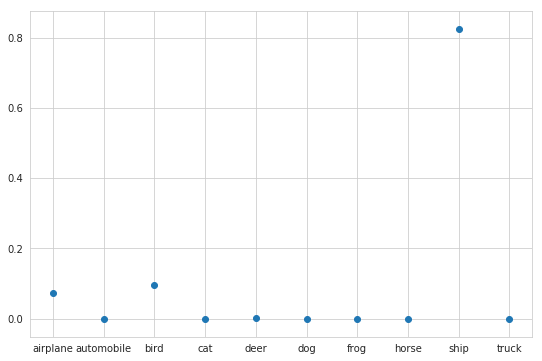

In [0]:
x = labels
y = model.predict(X_test)[150]

plt.figure(figsize = (9,6))
plt.scatter(x,y,cmap='plasma')

In [0]:
plt.figure(figsize=(11,7))
sns.set_style('whitegrid')
sns.stripplot(y = df[13],x =df.index,size = 10)

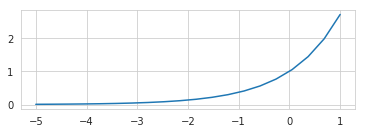

In [0]:
x = np.linspace(-5,1,20)
y = np.exp(x)
#plt.subplots(2,1)
ax = plt.subplot(212)
plt.plot(x,y)